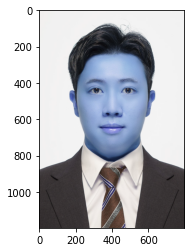

In [522]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
my_image_path = "증명사진.jpg"
whiskers_path = "cat-whiskers.png"
#my_image_path = 'aiffel/camera_sticker/images/image.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

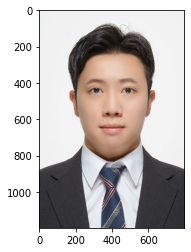

In [523]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [524]:
detector_hog = dlib.get_frontal_face_detector()

In [525]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

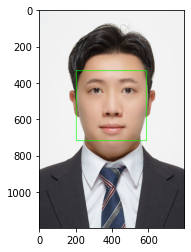

In [526]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [527]:
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
landmark_predictor

In [528]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
print(list_landmarks)

68
[[(204, 453), (207, 504), (215, 555), (227, 607), (244, 658), (269, 704), (306, 742), (349, 769), (401, 776), (452, 767), (498, 741), (537, 703), (565, 657), (581, 606), (592, 554), (599, 501), (602, 450), (241, 415), (266, 388), (301, 376), (337, 379), (371, 393), (429, 391), (462, 376), (499, 373), (533, 385), (558, 410), (401, 441), (401, 476), (401, 511), (402, 547), (366, 581), (384, 584), (402, 588), (420, 584), (438, 580), (280, 449), (301, 433), (328, 434), (349, 454), (326, 459), (299, 459), (455, 453), (476, 433), (502, 431), (523, 446), (505, 457), (479, 457), (330, 646), (358, 633), (384, 624), (401, 629), (418, 623), (444, 632), (473, 644), (445, 666), (420, 677), (401, 679), (382, 677), (357, 668), (342, 648), (383, 647), (401, 648), (419, 646), (462, 646), (419, 649), (401, 651), (383, 650)]]


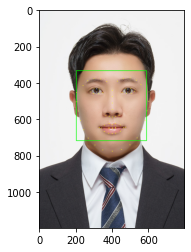

In [529]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

In [530]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(402, 547)
(x,y) : (402,354)
(w,h) : (386,386)


In [531]:
sticker_path = 'cat-whiskers.png' # 고양이
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape)# Check if the image was loaded successfully
#if img_sticker is None:
#    print("Error: Image not found or could not be loaded.")
#else:
#    w, h = 187, 187  # Example dimensions
#    img_sticker = cv2.resize(img_sticker, (w, h))  # Resize the sticker image
#    print(img_sticker.shape)

(386, 386, 3)


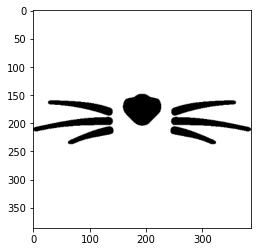

In [532]:
plt.imshow(img_sticker)

In [509]:
refined_x = x - w // 2 
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (209,-32)


In [513]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (209,0)


In [533]:
sticker_area = img_show[:img_sticker.shape[0], :img_sticker.shape[1]]
img_show[:img_sticker.shape[0], :+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

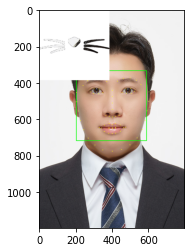

In [534]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

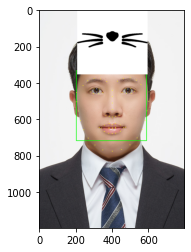

In [520]:
img_show_copy = img_show.copy()

sticker_area = img_show_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)

# 흰색 부분을 찾아 마스크 생성 (240 이상을 흰색으로 간주)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리

# 마스크의 반전 (투명 부분과 불투명 부분)
mask_inv = cv2.bitwise_not(mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

# 스티커 이미지에서 덧씌울 부분만 남기고 나머지 제거
sticker_fg = cv2.bitwise_and(img_sticker, img_sticker, mask=mask)

# 배경과 스티커를 합성
dst = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 원본 이미지에 적용
img_show_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = dst

plt.imshow(cv2.cvtColor(img_show_copy, cv2.COLOR_BGR2RGB))
plt.show()

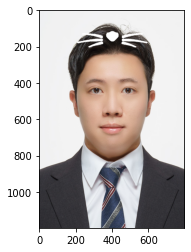

In [521]:
# 원본 이미지 복사본 생성
img_bgr_copy = img_bgr.copy()

# 스티커가 적용될 영역 설정
sticker_area = img_bgr_copy[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리
mask_inv = cv2.bitwise_not(mask)

# 흰색 스티커 이미지 생성
white_sticker = np.ones_like(img_sticker) * 255  # 흰색으로 채우기

# 흰색 스티커와 원본 스티커를 마스크를 사용하여 결합
sticker_fg = cv2.bitwise_and(white_sticker, white_sticker, mask=mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

# 배경과 흰색 스티커를 합성
dst = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 복사본 이미지에 적용
img_bgr_copy[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = dst

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 출력
plt.show()